This program asks you for the center coordinates of two 10 mm radius circles as x,y and calculates the IoU and Dice score based on the data obtained.

If you're ready, let's start.


Enter x coordinate of the center of the first circle:  15
Enter y coordinate of the center of the first circle:  25
Enter x coordinate of the center of the second circle:  0
Enter y coordinate of the center of the second circle:  0


Intersection Area:  0
IoU:  0.0
Dice:  0.0


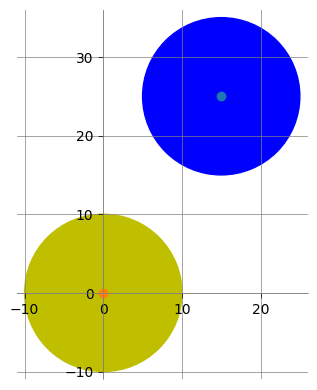

Do you want to define two new circles (Y/N)?  n


Goodbye.


In [2]:
import math
import matplotlib.pyplot as plt

def main():
    print("""This program asks you for the center coordinates of two 10 mm radius circles as x,y and calculates the IoU and Dice score based on the data obtained.

If you're ready, let's start.""")

    while True:  
        x1 = float(input("Enter x coordinate of the center of the first circle: "))
        y1 = float(input("Enter y coordinate of the center of the first circle: "))

        x2 = float(input("Enter x coordinate of the center of the second circle: "))
        y2 = float(input("Enter y coordinate of the center of the second circle: "))

        r = 10

        d = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
        if d >= 2*r:
            intersection_area = 0
        else:
            intersection_area = 2 * r**2 * math.acos(d / (2*r)) - (d/2) * math.sqrt(4 * r**2 - d**2)

        print("Intersection Area: ", intersection_area)
        
        union_area = 2*math.pi*r**2 - intersection_area
        IoU = intersection_area / union_area
        Dice = 2*intersection_area / (2*math.pi*r**2 + 2*math.pi*r**2)

        print("IoU: ", IoU)
        print("Dice: ", Dice)
        
        fig, ax = plt.subplots()

        circle1 = plt.Circle((x1, y1), r, color='b', fill=True)
        circle2 = plt.Circle((x2, y2), r, color='y', fill=True)

        ax.add_artist(circle1)
        ax.add_artist(circle2)

        ax.set_xlim([min(x1, x2) - r - 1, max(x1, x2) + r + 1])
        ax.set_ylim([min(y1, y2) - r - 1, max(y1, y2) + r + 1])
        
        if intersection_area > 0:
            a = d/2 + (r**2 - r**2)/(2*d)
            h = math.sqrt(r**2 - a**2)
            p2_x = x1 + a*(x2 - x1)/d
            p2_y = y1 + a*(y2 - y1)/d
            inter_x1 = p2_x - h*(y2 - y1)/d
            inter_y1 = p2_y + h*(x2 - x1)/d
            inter_x2 = p2_x + h*(y2 - y1)/d
            inter_y2 = p2_y - h*(x2 - x1)/d

            polygon = plt.Polygon(((inter_x1, inter_y1), (inter_x2, inter_y2)), color='lightgreen')
            ax.add_artist(polygon)
        
        ax.plot(x1, y1, 'o')
        ax.plot(x2, y2, 'o')
        
        ax.spines['left'].set_position('zero')
        ax.spines['left'].set_color('gray')
        ax.spines['left'].set_linewidth(0.5)
        ax.spines['bottom'].set_position('zero')
        ax.spines['bottom'].set_color('gray')
        ax.spines['bottom'].set_linewidth(0.5)

        ax.spines['right'].set_color('none')
        ax.spines['top'].set_color('none')

        ax.yaxis.tick_left()
        ax.xaxis.tick_bottom()
        ax.xaxis.set_tick_params(width=0.5)
        ax.yaxis.set_tick_params(width=0.5)

        plt.gca().set_aspect('equal', adjustable='box')
        plt.grid(True, which='both', color='gray', linewidth=0.5)
        plt.show()
        
        answer = input("Do you want to define two new circles (Y/N)? ")
        if answer.lower() == "n":
            print("Goodbye.")
            break

if __name__ == "__main__":
    main()
